### Student Information
Name: Hadar Natanson (Harper/羅蕙)

Student ID:112065430

GitHub ID: Hadar-N

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [701]:
### PRE PART 1 ###
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import math
from functools import reduce
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.naive_bayes import MultinomialNB
import data_mining_helpers_copy as dmh

%matplotlib inline

## consts and helpers

MAX_VALUES_IN_STRING = 15
MIN_AMOUNT = 100
col = ['coral', 'blue', 'black', 'orange']

def getSortedSeries(df: pd.DataFrame, property_name: str):
    return df[property_name].value_counts().sort_index(key=lambda x : x.str.lower())

# receives a CountVectorizer and an matrix representing the words in some texts and returns the words represented by numbers larger than 0
def find_non_zero_words(table: np.ndarray,dictionary: CountVectorizer) -> list:
    res = []
    for message_idx in range(table.shape[0]):
        arr = np.where(table[message_idx]>0)[0]
        for word_idx in arr:
            res.append(dictionary.get_feature_names_out()[word_idx])
    
    return res

#used later for making list into string and shortening it to limited amount of items  
def minimize_list(li: list, join_str: str, max_val: int) -> str:
    res = ""
    if(len(li) <= max_val):
        res = join_str.join(li)
    else: 
        res = (join_str.join(li[:max_val]) + "...")
    return res


# set variables (mostly copy from from lab file)
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

X = pd.DataFrame.from_records(dmh.format_rows(twenty_train.data), columns= ['text']) # this helper was updated!
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
X_sample = X.sample(n=1000,random_state=42)

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies_log = [math.log(i) for i in term_frequencies]


                        category_count_full_data  category_count_sample_data  \
category_name                                                                  
alt.atheism                                  480                         206   
comp.graphics                                584                         247   
sci.med                                      594                         277   
soc.religion.christian                       599                         270   

                        percentage_out_of_total  percentage_out_of_sample  
category_name                                                              
alt.atheism                           21.267169                      20.6  
comp.graphics                         25.875055                      24.7  
sci.med                               26.318121                      27.7  
soc.religion.christian                26.539654                      27.0  
['00', '01']


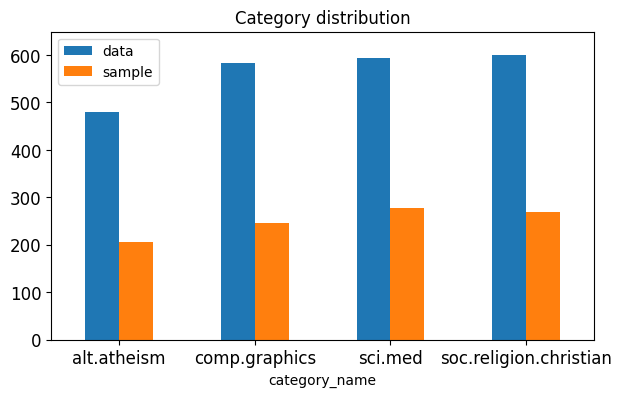

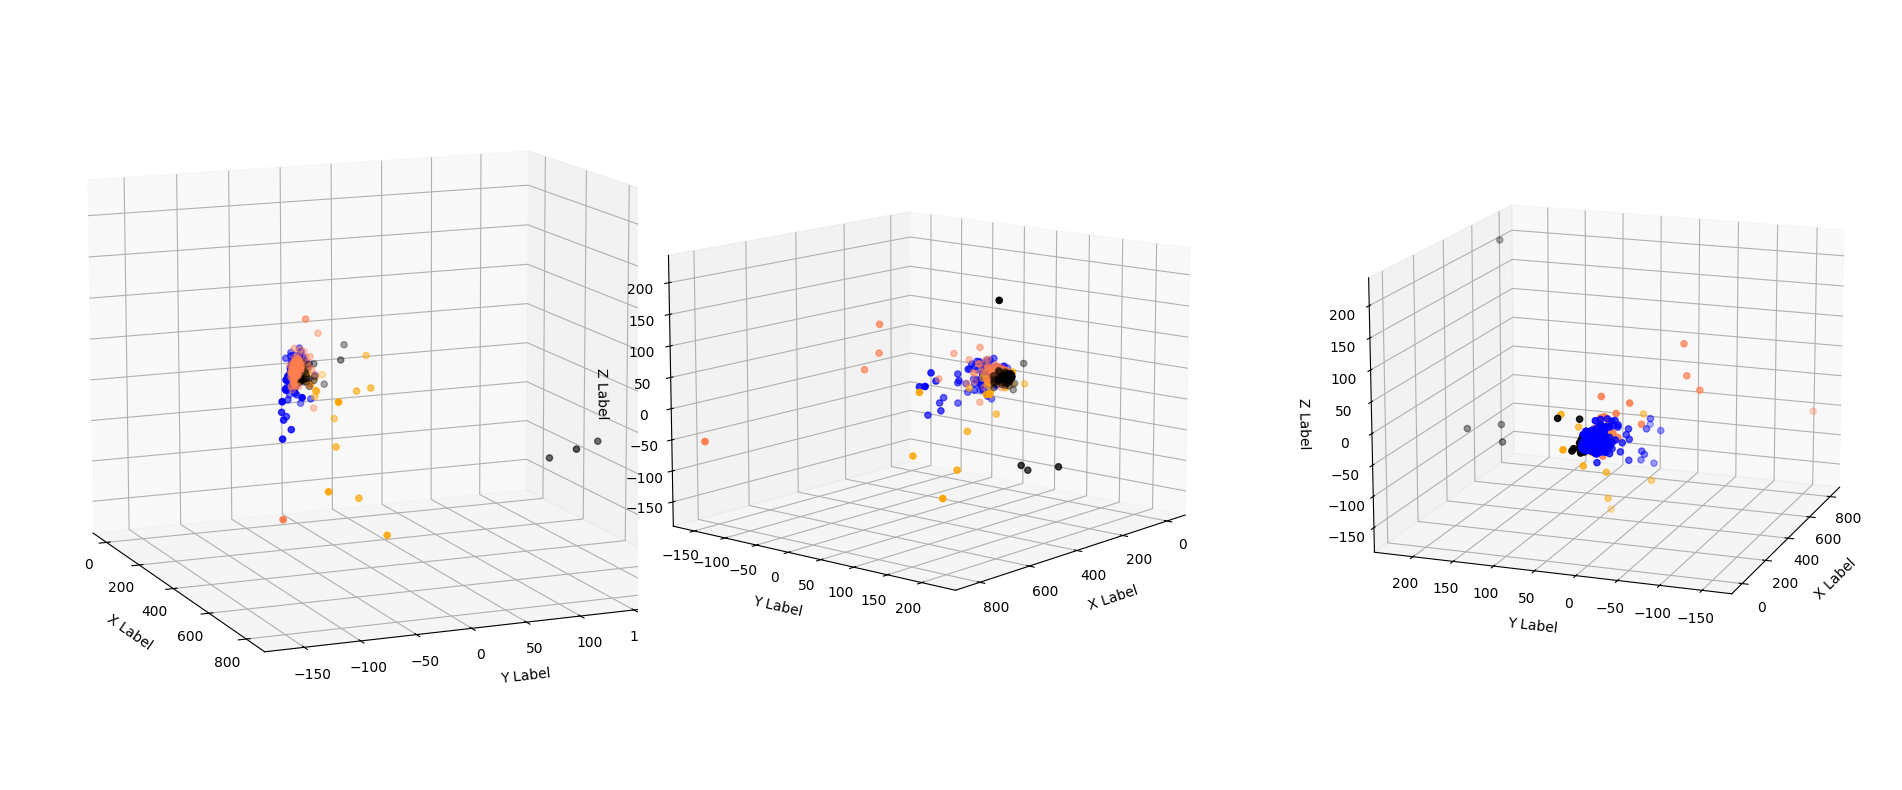

,text,category,category_name,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


In [671]:
### PART 1- Take Home Assignments ###

# Exercise 2 #
# --the tryouts were deleted--

# Exercise 5 #
# the response of isnull() is related to whether the value is considered null-y on python/panda.
NA_dict = [{ 'id': 'A', 'missing_example': np.nan }, # np.nan Not a Number which is considered null value
           { 'id': 'B'                    }, # value in missing therefore null
           { 'id': 'C', 'missing_example': 'NaN'  }, # the value is string therefore non-null
           { 'id': 'D', 'missing_example': 'None' }, # the value is string therefore non-null
           { 'id': 'E', 'missing_example':  None  }, # in Python, None keyword defines a null value
           { 'id': 'F', 'missing_example': ''     }] # in panda package, empty strings aren't considered null (as written in their documentation in https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html). 
# ==> results of isnull() should return: A,B,E: true, C,D,F: False.

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df['missing_example'].isnull()

# Exercise 6 #
# calculation of percentages of the different categories in both the full data and the sample data
percentages = pd.DataFrame(dict(
    category_count_full_data = X.groupby(by="category_name").count()["category"],
    category_count_sample_data = X_sample.groupby(by="category_name").count()["category"]
))
percentages["percentage_out_of_total"] = (percentages['category_count_full_data']/X.shape[0])*100
percentages["percentage_out_of_sample"] = (percentages['category_count_sample_data']/X_sample.shape[0])*100
print(percentages)
# 1st diff: on X, the largest category is "soc.religion.christian", but on X_sample it is "sci.med"
# 2nd diff: the gap between the smallest and biggest category grew in (7.1-5.27=)1.83% which changes the proportions heavily.
# 3rd diff: the category whose proportion changed the most is "sci.med", which grew in almost 1.4%

#Exercise 8 #
data_sample = getSortedSeries(X_sample, "category_name")
data_full = getSortedSeries(X, "category_name")
upper_bound = max(data_full + 50)

data_as_frame = pd.DataFrame({
    "data": data_full.values,
    "sample": data_sample.values
    },
    index= data_full.index
)

data_as_frame.plot(kind="bar",
    title = 'Category distribution',
    ylim = [0, upper_bound], 
    rot = 0, fontsize = 12, figsize = (7,4)
)

#Exercise 10#
#defining the limits to check and then calculating the words
match_table = X_counts[0:5, 0:100].toarray()
print(find_non_zero_words(match_table, count_vect))

#Exercise 11#

## 1st method- data transformation: check larger batches together instead of just 1 word in document,
                #  if the heatmap shows an area to be "hot", we can dissect it in another chart.
## 2nd method- data cleaning: 
                # 1. remove words with no meaning/numericals that will not help us understand the textx
                # 1. sum out the words in all documents to find and remove outliars

#Exercise 12#
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

# creating the plot in defined func. since much of the data is the same; but still need different graphs to show different angles
def plot_content(axis):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
    
        axis.scatter3D(xs, ys, zs, c = c, marker='o')

        axis.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
        axis.set_xlabel('\nX Label')
        axis.set_ylabel('\nY Label')
        axis.set_zlabel('\nZ Label')


# set the grid and add the plots to it
fig = plt.figure(figsize = (25,10))

ax = fig.add_subplot(1, 2, 1, projection='3d')
plot_content(ax)
ax.view_init(12, -23)

bx = fig.add_subplot(1, 3, 2, projection='3d')
plot_content(bx)
bx.view_init(12, 40)

cx = fig.add_subplot(1, 3, 3, projection='3d')
plot_content(cx)
cx.view_init(15, 200)

plt.show()
# from what it seems, the 3 colors seem to cover eachother quite well (no mater how we spin the graph to show anther color),
                # which means their overall vicabulary is quite similiar.
                # moreover, the blue group seems much larger, what means there are more texsts in it or the tests are longer.

#Exercise 13#
bar_df = pd.DataFrame(dict(
    term = count_vect.get_feature_names_out(),
    count = term_frequencies))

fig = px.bar(bar_df[:300], x = 'term', y = 'count',
             title = "wordcount barchart (plotly)")
fig.update_layout(
    font=dict(
        size=7,
        color="gray"
    )
)

fig.show()

#Exercise 14#

# 1st way: remove words with few occurrences, then sort the much smaller dataframe and view the top values
fig = px.bar(bar_df[bar_df['count'] > MIN_AMOUNT].sort_values(by="count", ascending=False)[:MIN_AMOUNT],
             x = 'term', y = 'count',
             title = "wordcount barchart 2 (plotly)")
fig.update_layout(
    font=dict(
        size=9,
        color="gray"
    )
)
fig.show()


# 2nd way: sum up the amout of terms appearing a certain amount of times.
# this can be used to see how many terms are non-repetitive, and often gets ignored in other visualizations.
# shown as a pie chart to show the proportions of frequent words to unique words.

# group the terms by the amount of times they appear in the db, the split into 2 groups farther group the more common words to 1 row (to be added as 1 to the unfrequent list)
by_terms_amount = pd.DataFrame(bar_df.groupby('count').apply(lambda x:[x["count"].iloc[0], len(x["term"]), x["term"].tolist()]).tolist(), 
                               columns=["count_per_term", "term_count", "terms"])
top_unfreq_occurances = by_terms_amount[by_terms_amount["count_per_term"] < (MIN_AMOUNT)/2]
top_freq_occurances = by_terms_amount[by_terms_amount["count_per_term"] >= (MIN_AMOUNT)/2]
freq_occurances_terms = list(reduce(lambda x, y: x + y, top_freq_occurances["terms"], []))
additional_row = pd.DataFrame(dict(
    count_per_term= str((MIN_AMOUNT)/2)+"+",
    term_count= len(freq_occurances_terms), 
    terms= [freq_occurances_terms]))
df_occurances = pd.concat([top_unfreq_occurances,additional_row])

df_occurances["string_for_hover"] = by_terms_amount["terms"].apply(lambda x : (minimize_list(x, "<br>", MAX_VALUES_IN_STRING)))

# create the plot itself
fig = px.pie(df_occurances, values = 'term_count', names="count_per_term",
             custom_data =['string_for_hover'],
             title = "popular occurances number (plotly)")
fig.update_layout(
    autosize=False,
    width=700,
    height=700
)
fig.update_traces(textinfo="percent", textfont_size=6,
    hovertemplate='amount of terms in category: %{value}<br>occurrences for each term: %{label}<br>relevant terms: %{customdata[0]}')

fig.show()


#Exercise 15#
fig = px.line(bar_df[bar_df['count'] > MIN_AMOUNT].sort_values(by="count", ascending=False)[:300],
             x = 'term', y = 'count',
             title = "wordcount longtail (plotly)")
fig.update_layout(
    font=dict(
        size=7,
        color="gray"
    )
)

fig.show()

#Exercise 16#
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)

X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]

#result- this works great. Since the category_name(s) are well defines and were created using the category column, it works the same way (since both did not change) 


In [672]:
### PART 2- New Database (fetch+set variables) ###

# fetching the files and combining them into 1 dataframe
repository_name = 'new_dataset'
filenames = ["amazon_cells_labelled.txt","imdb_labelled.txt","yelp_labelled.txt"]
full_new_data = pd.DataFrame(None, columns=["text", "score", "source_name"]) 
for filename in filenames:
     currFrame = (pd.DataFrame(np.loadtxt(repository_name+"/"+filename, 
                delimiter='\t', dtype=str), columns=["text", "score"]))
     currFrame["source_name"] = filename
     full_new_data = pd.concat([full_new_data,currFrame])

# copy the data before formatting to the dataframe
X_new = full_new_data.copy()
X_new["text"] = pd.DataFrame.from_records(dmh.format_rows(full_new_data["text"].tolist()), columns= ['text'])

# creating new vector and setting the full data according to it
count_vect_new = CountVectorizer()
X_counts_new = count_vect_new.fit_transform(X_new.text) #learn the vocabulary and return document-term matrix

term_frequencies_new = np.asarray(X_counts_new.sum(axis=0))[0]
term_frequencies_log_new = [math.log(i) for i in term_frequencies_new]


['45']


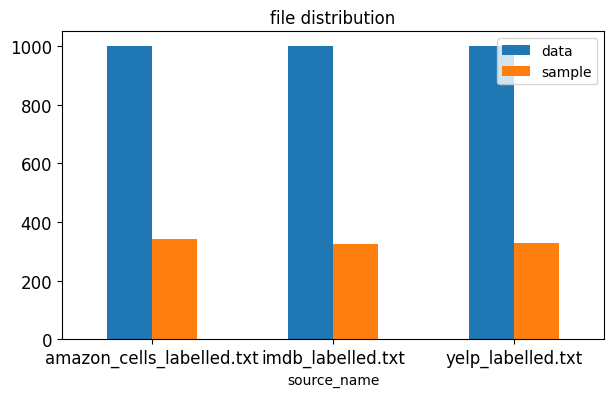

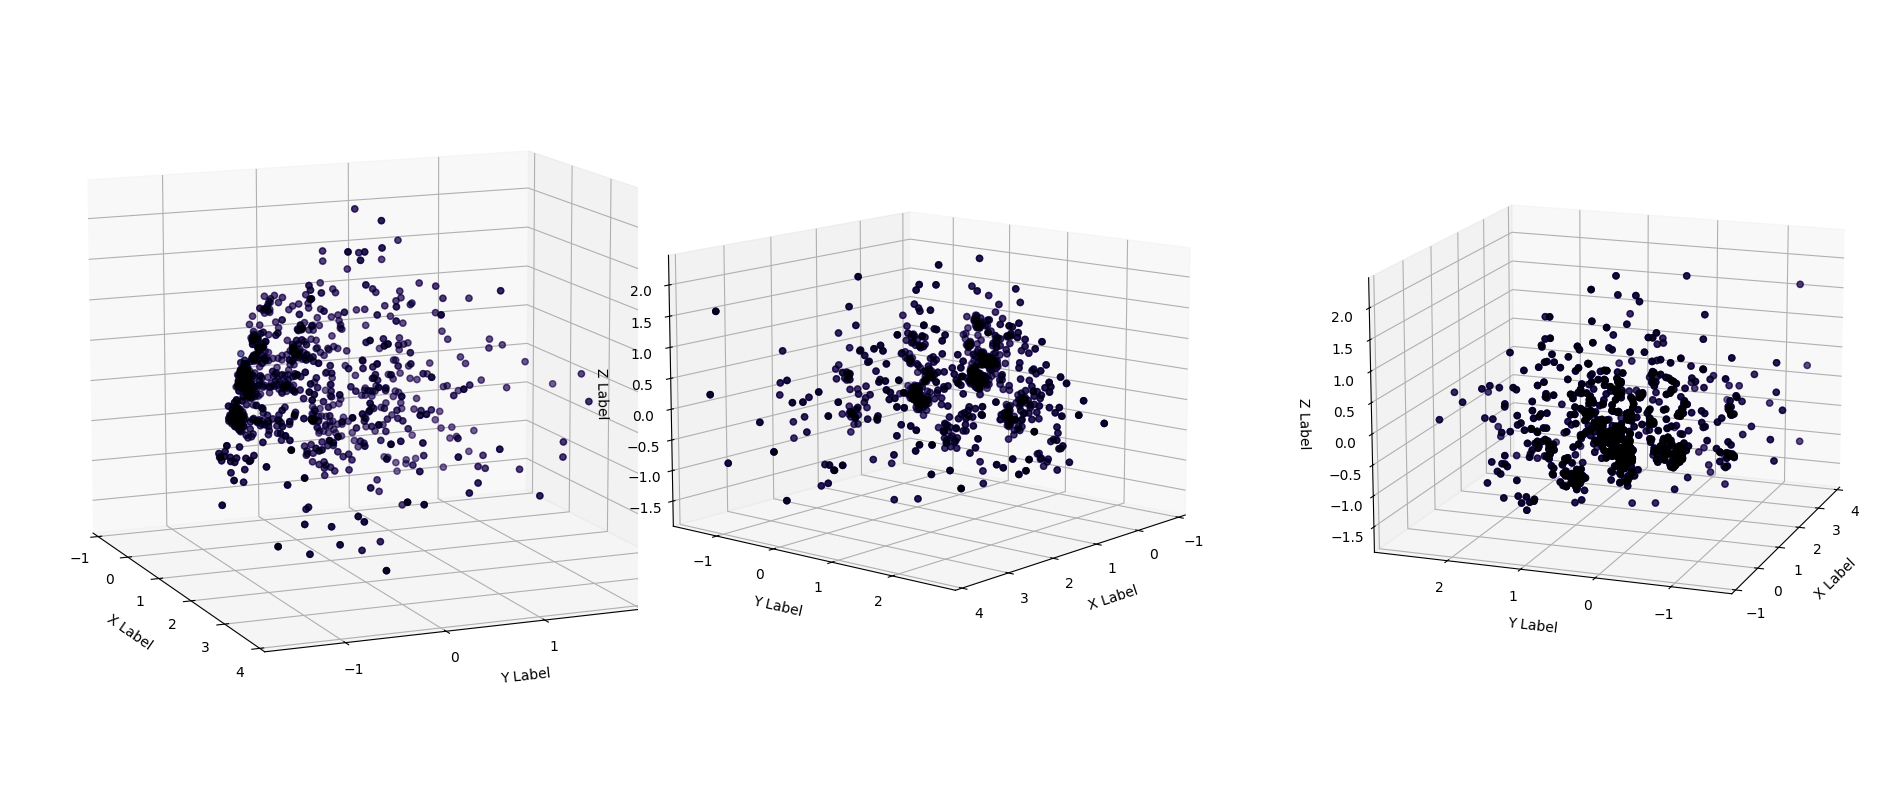

,text,score,source_name,bin_category
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled.txt,"[1, 0, 0]"
1,"Good case, Excellent value.",1,amazon_cells_labelled.txt,"[1, 0, 0]"
2,Great for the jawbone.,1,amazon_cells_labelled.txt,"[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled.txt,"[1, 0, 0]"
4,The mic is great.,1,amazon_cells_labelled.txt,"[1, 0, 0]"
5,I have to jiggle the plug to get it to line up...,0,amazon_cells_labelled.txt,"[1, 0, 0]"
6,If you have several dozen or several hundred c...,0,amazon_cells_labelled.txt,"[1, 0, 0]"
7,If you are Razr owner...you must have this!,1,amazon_cells_labelled.txt,"[1, 0, 0]"
8,"Needless to say, I wasted my money.",0,amazon_cells_labelled.txt,"[1, 0, 0]"


In [673]:
### PART 2- relevant exercises on new db ###
# most of this part is copied from the homework, therefore there are less comments. above each drill there's reference to the original version.

#Exercise 8 #
X_sample_new = X_new.sample(n=1000,random_state=42)
new_data_sample = getSortedSeries(X_sample_new, "source_name")
new_data_full = getSortedSeries(X_new, "source_name")
upper_bound = max(new_data_full + 50)

data_as_frame_new = pd.DataFrame({
    "data": new_data_full.values,
    "sample": new_data_sample.values
    },
    index= new_data_full.index
)

data_as_frame_new.plot(kind="bar",
    title = 'file distribution',
    ylim = [0, upper_bound], 
    rot = 0, fontsize = 12, figsize = (7,4)
)


#Exercise 10#
match_table_new = X_counts_new[0:5, 0:100].toarray()
print(find_non_zero_words(match_table_new, count_vect_new))

#Exercise 12#
X_reduced_new = PCA(n_components = 3).fit_transform(X_counts_new.toarray())

def plot_new_content(axis):
    for c, filename in zip(col, filenames):
        xs = X_reduced_new[X_new['source_name'] == filename].T[0]
        ys = X_reduced_new[X_new['source_name'] == filename].T[1]
        zs = X_reduced_new[X_new['source_name'] == filename].T[2]
    
        axis.scatter3D(xs, ys, zs, c = c, marker='o')

        axis.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
        axis.set_xlabel('\nX Label')
        axis.set_ylabel('\nY Label')
        axis.set_zlabel('\nZ Label')


# plot
fig = plt.figure(figsize = (25,10))

ax_new = fig.add_subplot(1, 2, 1, projection='3d')
plot_new_content(ax_new)
ax_new.view_init(12, -23)

bx_new = fig.add_subplot(1, 3, 2, projection='3d')
plot_new_content(bx_new)
bx_new.view_init(12, 40)

cx_new = fig.add_subplot(1, 3, 3, projection='3d')
plot_new_content(cx_new)
cx_new.view_init(15, 200)

plt.show()
#TODO: check colors

#Exercise 13#
bar_df_new = pd.DataFrame(dict(
    term = count_vect_new.get_feature_names_out(),
    count = term_frequencies_new))

fig = px.bar(bar_df_new[:300], x = 'term', y = 'count',
             title = "wordcount barchart (plotly)")
fig.update_layout(
    font=dict(
        size=7,
        color="gray"
    )
)

fig.show()

#Exercise 14#

# 1st way: remove outliars with few occurrences, then sort the much smaller dataframe and view the top values
fig = px.bar(bar_df_new[bar_df_new['count'] > MIN_AMOUNT].sort_values(by="count", ascending=False)[:100],
             x = 'term', y = 'count',
             title = "wordcount barchart 2 (plotly)")
fig.update_layout(
    font=dict(
        size=9,
        color="gray"
    )
)
fig.show()


# 2nd way: sum up the amout of terms appearing a certain amount of times. the logic was explained in the 1st part.

# group the terms by the amount of times they appear in the db, the split into 2 groups farther group the more common words to 1 row (to be added as 1 to the unfrequent list)
by_terms_amount_new = pd.DataFrame(bar_df_new.groupby('count').apply(lambda x:[x["count"].iloc[0], len(x["term"]), x["term"].tolist()]).tolist(), 
                               columns=["count_per_term", "term_count", "terms"])
top_unfreq_occurances_new = by_terms_amount_new[by_terms_amount_new["count_per_term"] < (MIN_AMOUNT)/2]
top_freq_occurances_new = by_terms_amount_new[by_terms_amount_new["count_per_term"] >= (MIN_AMOUNT)/2]
freq_occurances_terms_new = list(reduce(lambda x, y: x + y, top_freq_occurances_new["terms"], []))
additional_row_new = pd.DataFrame(dict(
    count_per_term= str((MIN_AMOUNT)/2)+"+",
    term_count= len(freq_occurances_terms_new), 
    terms= [freq_occurances_terms_new]))
df_occurances_new = pd.concat([top_unfreq_occurances_new,additional_row_new])

df_occurances_new["string_for_hover"] = by_terms_amount_new["terms"].apply(lambda x : (minimize_list(x, "<br>", MAX_VALUES_IN_STRING)))

# create the plot itself
fig = px.pie(df_occurances_new, values = 'term_count', names="count_per_term",
             custom_data =['string_for_hover'],
             title = "popular occurances number (plotly)")
fig.update_layout(
    autosize=False,
    width=700,
    height=700
)
fig.update_traces(textinfo="percent", textfont_size=6,
    hovertemplate='amount of terms in category: %{value}<br>occurrences for each term: %{label}<br>relevant terms: %{customdata[0]}')

fig.show()

#Exercise 15#
fig = px.line(bar_df_new[bar_df_new['count'] > MIN_AMOUNT].sort_values(by="count", ascending=False)[:300],
             x = 'term', y = 'count',
             title = "wordcount longtail (plotly)")
fig.update_layout(
    font=dict(
        size=7,
        color="gray"
    )
)

fig.show()

#Exercise 16#
mlb_new = preprocessing.LabelBinarizer()
mlb_new.fit(X_new.source_name)

X_new['bin_category'] = mlb_new.transform(X_new['source_name']).tolist()
X_new[0:9]


In [700]:
## PART 3 - tasks on new dataset ##

# Exercise 1: new data visualization
# Visualization to try and find words that are often labeled as positive/negative:

# differenciate between negative and positive texts, while refering to the full lists' vocabulary
X_positive = X_new.query("score == '1'")
X_negative = X_new.query("score == '0'")

X_counts_pos = count_vect_new.transform(X_positive.text)
X_counts_neg = count_vect_new.transform(X_negative.text)

term_frequencies_pos = np.asarray(X_counts_pos.sum(axis=0))[0]
term_frequencies_neg = np.asarray(X_counts_neg.sum(axis=0))[0]

df_pos_neg = pd.DataFrame(dict(
    term = count_vect_new.get_feature_names_out(),
    positive_count= term_frequencies_pos,
    negative_count= term_frequencies_neg,
    total_count = term_frequencies_new))

#  calculate difference between the positive and negative connotations for each word
df_pos_neg["diff"] = (df_pos_neg["positive_count"] - df_pos_neg["negative_count"])

# draw plot to show the biggest diffs
df_pos_neg = (df_pos_neg.sort_values(by="diff"))
df_pos_neg = pd.concat([df_pos_neg[:int(MIN_AMOUNT)],df_pos_neg[int(-MIN_AMOUNT):]])

fig = px.bar(df_pos_neg,
             x = 'term', y = 'diff',
             title = "positive-negative longtail (plotly)",
             custom_data=["positive_count","negative_count","total_count"])
fig.update_traces(hovertemplate="term: %{x}<br> pos-neg difference: %{y}<br> positive count: %{customdata[0]}<br> negative count: %{customdata[1]}<br> total count: %{customdata[2]} <extra></extra>")
fig.add_scatter(x=df_pos_neg['term'], y=df_pos_neg['positive_count'], name= "positive", hoverinfo='none')
fig.add_scatter(x=df_pos_neg['term'], y=df_pos_neg['negative_count'], name= "negative", hoverinfo='none')
fig.update_layout(
    hovermode="x unified",
    font=dict(
        size=7,
        color="gray"
    )
)

fig.show()


# Exercise 2: TF-IDF features
tf_idf_vect = TfidfVectorizer()
X_new_tfidf_counts = tf_idf_vect.fit_transform(X_new.text)
# TODO: FEATURE!!!

# Exercise 3: Naive Bayes classifier
# this refetches the files with the texts, but now divides them into 2: 2 files to teach the model and 1 to test it.

# fetching the data
new_data_train = pd.DataFrame(None, columns=["text", "score", "source_name"]) 
new_data_test = pd.DataFrame(None, columns=["text", "score", "source_name"]) 
for filename in filenames:
     currFrame = (pd.DataFrame(np.loadtxt(repository_name+"/"+filename, 
                delimiter='\t', dtype=str), columns=["text", "score"]))
     currFrame["source_name"] = filename
     if filename == filenames[0]:
        new_data_test = pd.concat([full_new_data,currFrame])
     else:
        new_data_train = pd.concat([full_new_data,currFrame])

# preparing the data
new_data_train["text"] = pd.DataFrame.from_records(dmh.format_rows(new_data_train["text"].tolist()), columns= ['text'])
new_data_test["text"] = pd.DataFrame.from_records(dmh.format_rows(new_data_test["text"].tolist()), columns= ['text'])

X_counts_train = count_vect_new.transform(new_data_train.text)
X_counts_test = count_vect_new.transform(new_data_test.text)

# creating the model
multi_nb = MultinomialNB()
multi_nb.fit(X_counts_train.toarray(),new_data_train["score"])

#this runs the 
def run_sentence_through_naive_bayes(sentence: str | pd.Series):
     sntc_arr = sentence
     if isinstance(sentence, str):
        sntc_arr = [sntc_arr]
     sntc_formatted = pd.DataFrame.from_records(dmh.format_rows(sntc_arr), columns= ['text'])
     sntc_vector = count_vect_new.transform(sntc_formatted.text)
     return multi_nb.predict(sntc_vector.toarray())

# testing the model
y2_pred = run_sentence_through_naive_bayes(new_data_test["text"])
print(metrics.accuracy_score(y2_pred, new_data_test["score"]))



0.7023511755877939
